In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/RobaeeDataset.zip

In [ ]:
!pip install hazm

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dirpath = "./RobaeeDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,از حلقهٔ گوش از دلم باخبر است در حلقهٔ او دل ...,moulavi
1,آنجا بنشین که همنشین مردانند تا دود کدورت ترا...,moulavi
2,دانیکه چه میگوید این بانگ رباب اندر پی من بیا...,moulavi
3,جان چو سمندرم نگاری دارد در آتش او چه خوش قرا...,moulavi
4,بیمارم و غم در امتحانم دارد اما غم او تر و جو...,moulavi
...,...,...
2167,در خدمت تو چو صرف شد عمر دراز گفتم که مگر با ...,abusaeed
2168,بر تافت عنان صبوری از جان خراب شد همچو ر کاب ح...,abusaeed
2169,آنها که ز معبود خبر یافته‌اند از جملهٔ کاینات...,abusaeed
2170,یار آمد و گفت خسته میدار دلت دایم به امید بست...,abusaeed


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,از حلقه گوش از دلم باخبر است در حلقه او دل از ...,moulavi
1,آنجا بنشین که همنشین مردانند تا دود کدورت ترا ...,moulavi
2,دانیکه چه می گوید این بانگ رباب اندر پی من بیا...,moulavi
3,جان چو سمندرم نگاری دارد در آتش او چه خوش قرار...,moulavi
4,بیمارم و غم در امتحانم دارد اما غم او تر و جوا...,moulavi
...,...,...
2167,در خدمت تو چو صرف شد عمر دراز گفتم که مگر با ت...,abusaeed
2168,بر تافت عنان صبوری از جان خراب شد همچو ر کاب ح...,abusaeed
2169,آنها که ز معبود خبر یافته اند از جمله کاینات س...,abusaeed
2170,یار آمد و گفت خسته میدار دلت دایم به امید بسته...,abusaeed


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,حلقه گوش باخبر حلقه دل حلقه زبر چرخ غم ذره آفت...,moulavi
1,بنشین همنشین مردانند دود کدورت بنشانند اندیشه ...,moulavi
2,دانیکه بانگ رباب ره دریاب خطا بری صواب ره بری ...,moulavi
3,جان سمندرم نگاری آتش قراری باده لبهاش بگردان س...,moulavi
4,بیمارم غم امتحانم غم جوانم طرفه نگر رنجوری غمش...,moulavi
...,...,...
2167,خدمت عمر دراز محرم راز دانستم تاز نرسم جهان مانم,abusaeed
2168,تافت عنان صبوری جان خراب کاب حلقه تب تاب عنان ...,abusaeed
2169,معبود خبر کاینات دریوزه مردان مردان قرب,abusaeed
2170,یار خسته میدار دلت امید دلت شکستگان نظرها شکست...,abusaeed


In [ ]:
df['cleaned_poems'] = df['poem'].apply(lambda t: normalizer.normalize(t))
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,حلقه گوش باخبر حلقه دل حلقه زبر چرخ غم ذره آفت...,moulavi
1,بنشین همنشین مردانند دود کدورت بنشانند اندیشه ...,moulavi
2,دانیکه بانگ رباب ره دریاب خطا بری صواب ره بری ...,moulavi
3,جان سمندرم نگاری آتش قراری باده لبهاش بگردان س...,moulavi
4,بیمارم غم امتحانم غم جوانم طرفه نگر رنجوری غمش...,moulavi
...,...,...
2167,خدمت عمر دراز محرم راز دانستم تاز نرسم جهان مانم,abusaeed
2168,تافت عنان صبوری جان خراب کاب حلقه تب تاب عنان ...,abusaeed
2169,معبود خبر کاینات دریوزه مردان مردان قرب,abusaeed
2170,یار خسته میدار دلت امید دلت شکستگان نظرها شکست...,abusaeed


moulavi     724
attar       724
abusaeed    724
Name: poet, dtype: int64


<Axes: >

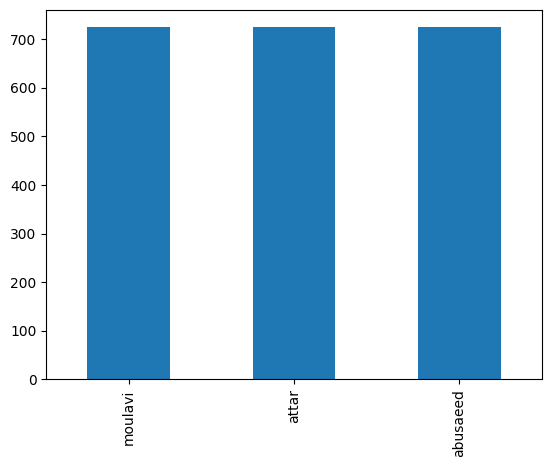

In [ ]:
count = df['poet'].value_counts()

print(count)
count.plot.bar()

In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['abusaeed', 'attar', 'moulavi']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,حلقه گوش باخبر حلقه دل حلقه زبر چرخ غم ذره آفت...,moulavi,2
1,بنشین همنشین مردانند دود کدورت بنشانند اندیشه ...,moulavi,2
2,دانیکه بانگ رباب ره دریاب خطا بری صواب ره بری ...,moulavi,2
3,جان سمندرم نگاری آتش قراری باده لبهاش بگردان س...,moulavi,2
4,بیمارم غم امتحانم غم جوانم طرفه نگر رنجوری غمش...,moulavi,2
...,...,...,...
2167,خدمت عمر دراز محرم راز دانستم تاز نرسم جهان مانم,abusaeed,0
2168,تافت عنان صبوری جان خراب کاب حلقه تب تاب عنان ...,abusaeed,0
2169,معبود خبر کاینات دریوزه مردان مردان قرب,abusaeed,0
2170,یار خسته میدار دلت امید دلت شکستگان نظرها شکست...,abusaeed,0


In [ ]:
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'abusaeed': 0, 'attar': 1, 'moulavi': 2}
id2label: {0: 'abusaeed', 1: 'attar', 2: 'moulavi'}


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
val_data, test_data = train_test_split(test_data, test_size=0.1, random_state=1, shuffle=True)

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoConfig, AutoTokenizer
from transformers import BertConfig, BertTokenizer

MODEL_NAME = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

max:  58
min:  7


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

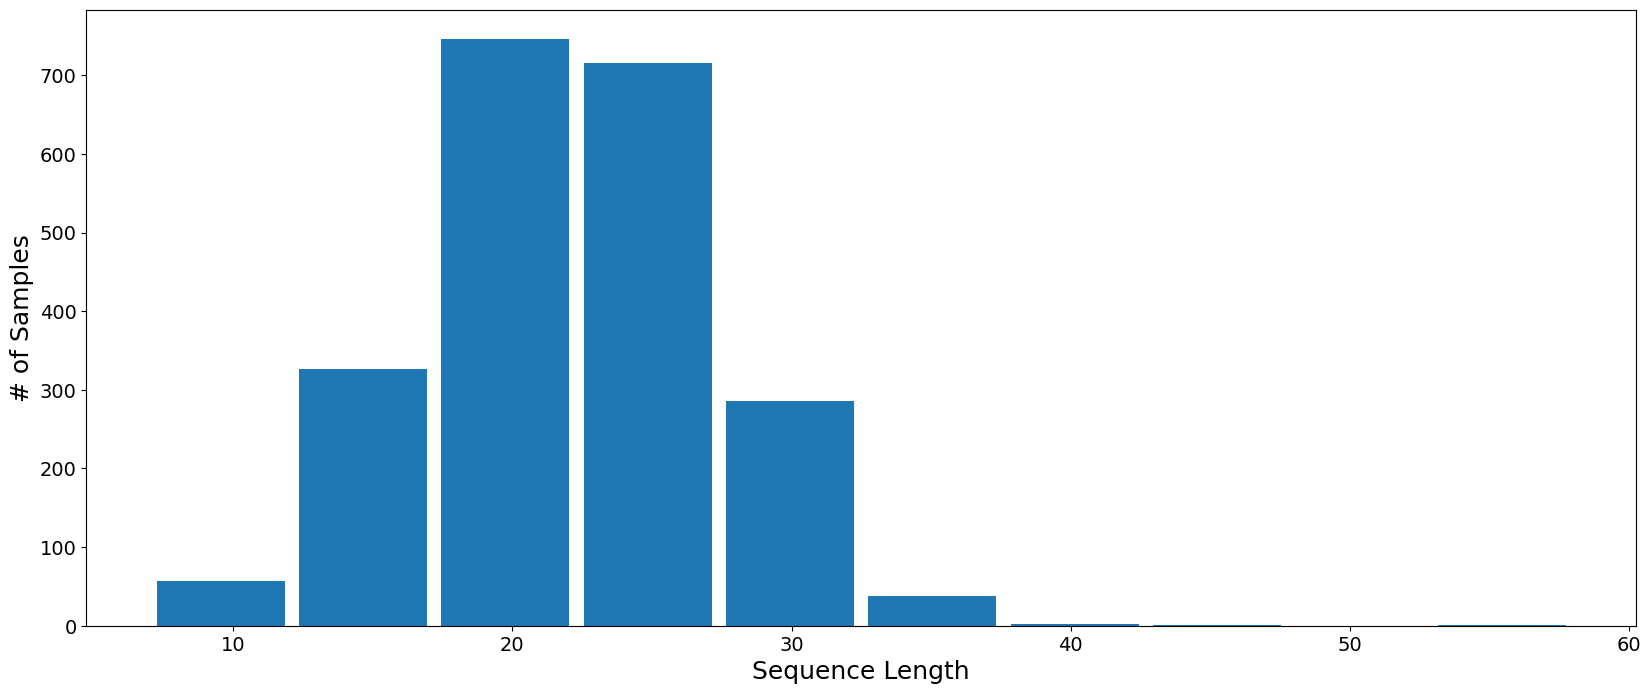

In [ ]:
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            df.poem.values.tolist(),
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [ ]:
SEQ_LEN = 128
BATCH_SIZE = 32

In [ ]:
tokens = tokenizer(train_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
val_data_tokens = tokenizer(val_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
test_data_tokens = tokenizer(test_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


le = LabelEncoder()
y_train_le = le.fit_transform(train_data['label_id'])
y_valid_le  = le.fit_transform(val_data['label_id'])
y_test_le = le.fit_transform(test_data['label_id'])

hotlabels = to_categorical(y_train_le)
val_labels = to_categorical(y_valid_le)
test_labels = to_categorical(y_test_le)

In [ ]:
import tensorflow as tf

def map_func(input_ids, attention_mask, labels):
    return ({'input_ids': input_ids,
            'attention_mask': attention_mask}, labels)

# train_size = int((tokens['input_ids'].shape[0] / BATCH_SIZE) * 0.8)

train_dataset = tf.data.Dataset.from_tensor_slices((tokens['input_ids'], tokens['attention_mask'], hotlabels))
train_dataset = train_dataset.map(map_func)
train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)


val_dataset = tf.data.Dataset.from_tensor_slices((val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_labels))
val_dataset = val_dataset.map(map_func)
val_dataset = val_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_tokens['input_ids'], test_data_tokens['attention_mask'], test_labels))
test_dataset = test_dataset.map(map_func)
test_dataset = test_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
from transformers import TFXLMRobertaForSequenceClassification
base_model = TFXLMRobertaForSequenceClassification.from_pretrained(
    "xlm-roberta-base",
    num_labels = len(set(labels)),
    id2label=id2label,
    label2id=label2id,
)

All PyTorch model weights were used when initializing TFXLMRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFXLMRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')
classificationResult = base_model([input_ids, mask]).logits
Final_output = tf.keras.layers.Dense(3, activation ='softmax', trainable=True)(classificationResult)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=Final_output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tfxlm_roberta_for_sequence_cla  TFSequenceClassifie  278045955  ['input_ids[0][0]',              
 ssification (TFXLMRobertaForSe  rOutput(loss=None,               'attention_mask[0][0]']         
 quenceClassification)          logits=(None, 3),                                                 
                                 hidden_states=None                                           

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #learning_rate=1e-4, decay=1e-6
loss= tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
# f1 = tf.keras.metrics.F1Score(average='weighted', name='f1_score')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
54/54 [==============================] - 113s 941ms/step - loss: 1.1060 - accuracy: 0.3142 - val_loss: 1.0993 - val_accuracy: 0.3229
Epoch 2/5
54/54 [==============================] - 45s 836ms/step - loss: 1.0959 - accuracy: 0.3536 - val_loss: 1.0807 - val_accuracy: 0.4167
Epoch 3/5
54/54 [==============================] - 45s 831ms/step - loss: 1.0783 - accuracy: 0.3987 - val_loss: 1.0596 - val_accuracy: 0.5026
Epoch 4/5
54/54 [==============================] - 45s 833ms/step - loss: 1.0313 - accuracy: 0.4508 - val_loss: 0.9939 - val_accuracy: 0.5729
Epoch 5/5
54/54 [==============================] - 45s 841ms/step - loss: 0.9422 - accuracy: 0.5330 - val_loss: 0.9154 - val_accuracy: 0.5599


In [ ]:
final_accuracy = history.history['val_accuracy']

print('FINAL ACCURACY: ', np.mean(final_accuracy))

FINAL ACCURACY:  0.475


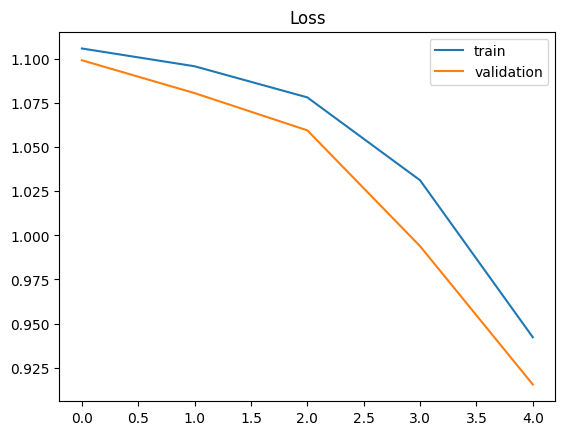

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [ ]:
added_epochs = 5
total_epochs =  5 + added_epochs

new_history = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_dataset)


Epoch 5/10
54/54 [==============================] - 44s 815ms/step - loss: 0.8588 - accuracy: 0.5885 - val_loss: 0.8096 - val_accuracy: 0.6172
Epoch 6/10
54/54 [==============================] - 44s 813ms/step - loss: 0.7216 - accuracy: 0.6748 - val_loss: 0.8663 - val_accuracy: 0.6562
Epoch 7/10
54/54 [==============================] - 45s 839ms/step - loss: 0.6380 - accuracy: 0.7205 - val_loss: 0.8751 - val_accuracy: 0.6432
Epoch 8/10
54/54 [==============================] - 45s 839ms/step - loss: 0.5094 - accuracy: 0.7824 - val_loss: 0.9112 - val_accuracy: 0.6667
Epoch 9/10
54/54 [==============================] - 45s 840ms/step - loss: 0.5179 - accuracy: 0.7587 - val_loss: 0.9214 - val_accuracy: 0.6432
Epoch 10/10
54/54 [==============================] - 47s 870ms/step - loss: 0.3755 - accuracy: 0.8490 - val_loss: 1.0321 - val_accuracy: 0.7240


In [ ]:
final_accuracy = new_history.history['val_accuracy']

print('FINAL ACCURACY: ', np.mean(final_accuracy))

FINAL ACCURACY:  0.6584201455116272


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

1/1 [==============================] - 0s 436ms/step - loss: 0.7439 - accuracy: 0.7188


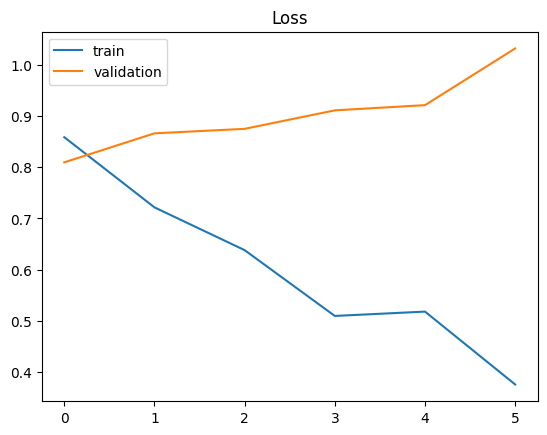

In [ ]:
plt.title('Loss')
plt.plot(new_history.history['loss'], label='train')
plt.plot(new_history.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [ ]:
def prep_data(text):
    tokens = tokenizer(text, max_length=SEQ_LEN, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    return ({'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask']})

In [ ]:
import numpy as np

test_data['predicted-label'] = None
# i = 0
for i, text in zip(test_data.index, test_data['poem']):
    tokens = prep_data(text)
    probs = model.predict(tokens)
    pred = np.argmax(probs)
    test_data['predicted-label'][i] = pred


In [ ]:
testlist = test_data['label_id'].tolist()
predlist = test_data['predicted-label'].tolist()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(testlist, predlist, target_names=labels))

              precision    recall  f1-score   support

    abusaeed       0.58      0.47      0.52        15
       attar       0.67      0.91      0.77        11
     moulavi       0.71      0.67      0.69        18

    accuracy                           0.66        44
   macro avg       0.65      0.68      0.66        44
weighted avg       0.65      0.66      0.65        44



<Axes: >

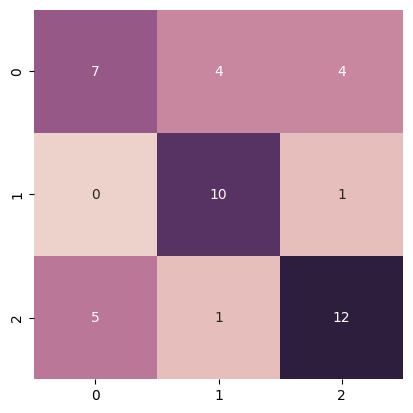

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(testlist, predlist)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)